## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
import tensorflow as tf 
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 14995 files belonging to 8 classes.


## Validation image preporcessing



In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),  
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False 
)


Found 3748 files belonging to 8 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[132.25 123.25 126.25]
   [131.   122.   125.  ]
   [131.75 122.75 125.75]
   ...
   [125.5  119.5  121.5 ]
   [131.5  125.5  127.5 ]
   [137.   131.   133.  ]]

  [[135.25 126.25 129.25]
   [138.   129.   132.  ]
   [136.5  127.5  130.5 ]
   ...
   [129.   123.   125.  ]
   [130.25 124.25 126.25]
   [135.5  129.5  131.5 ]]

  [[125.   116.   119.  ]
   [130.25 121.25 124.25]
   [133.   124.   127.  ]
   ...
   [132.   126.   128.  ]
   [131.5  125.5  127.5 ]
   [123.75 117.75 119.75]]

  ...

  [[213.5  212.5  208.5 ]
   [212.5  211.5  207.5 ]
   [213.75 212.75 208.75]
   ...
   [193.5  191.5  192.5 ]
   [193.5  191.5  192.5 ]
   [191.25 189.25 190.25]]

  [[203.75 202.75 198.75]
   [216.75 215.75 211.75]
   [212.5  211.5  207.5 ]
   ...
   [195.75 193.75 196.75]
   [192.25 190.25 193.25]
   [193.5  191.5  194.5 ]]

  [[213.25 212.25 208.25]
   [209.5  208.5  204.5 ]
   [216.5  215.5  211.5 ]
   ...
   [195.   193.   196.  ]
   [191.   189.   192.  ]
   [191.75 189.75 19

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential


In [7]:
model = Sequential() 

## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))


In [17]:
#output layer
model.add(Dense(units=8,activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        12,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [13]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

ValueError: You must call `compile()` before using the model.

## Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

In [ ]:
print(train_loss,train_acc)

In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

## Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]


## Accuracy Visualization

In [ ]:
import matplotlib.pyplot as plt  


epochs = [i for i in range(1, 11)]


plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False 
)

In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

In [75]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [76]:
predicted_categories

<tf.Tensor: shape=(3748,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [77]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2024-09-25 19:20:45.314910: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(3748, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [78]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(3748,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                            precision    recall  f1-score   support

                        Apple___Apple_scab       0.96      0.98      0.97       504
                         Apple___Black_rot       1.00      0.86      0.93       497
                  Apple___Cedar_apple_rust       0.90      1.00      0.94       440
                           Apple___healthy       0.98      0.98      0.98       502
                         Grape___Black_rot       0.99      0.98      0.98       472
              Grape___Esca_(Black_Measles)       1.00      0.99      0.99       480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.98      1.00      0.99       430
                           Grape___healthy       0.99      1.00      0.99       423

                                  accuracy                           0.97      3748
                                 macro avg       0.97      0.97      0.97      3748
                              weighted avg       0.97      0.97      0.97 

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true, predicted_categories)
print(cm)


[[492   0   7   4   0   0   1   0]
 [ 15 429  41   6   2   1   0   3]
 [  1   0 439   0   0   0   0   0]
 [  6   0   1 493   0   0   0   2]
 [  0   0   2   0 463   1   6   0]
 [  0   0   0   0   5 474   1   0]
 [  0   0   0   0   0   0 430   0]
 [  1   0   0   0   0   0   0 422]]


## Confusion Matrix Visualization

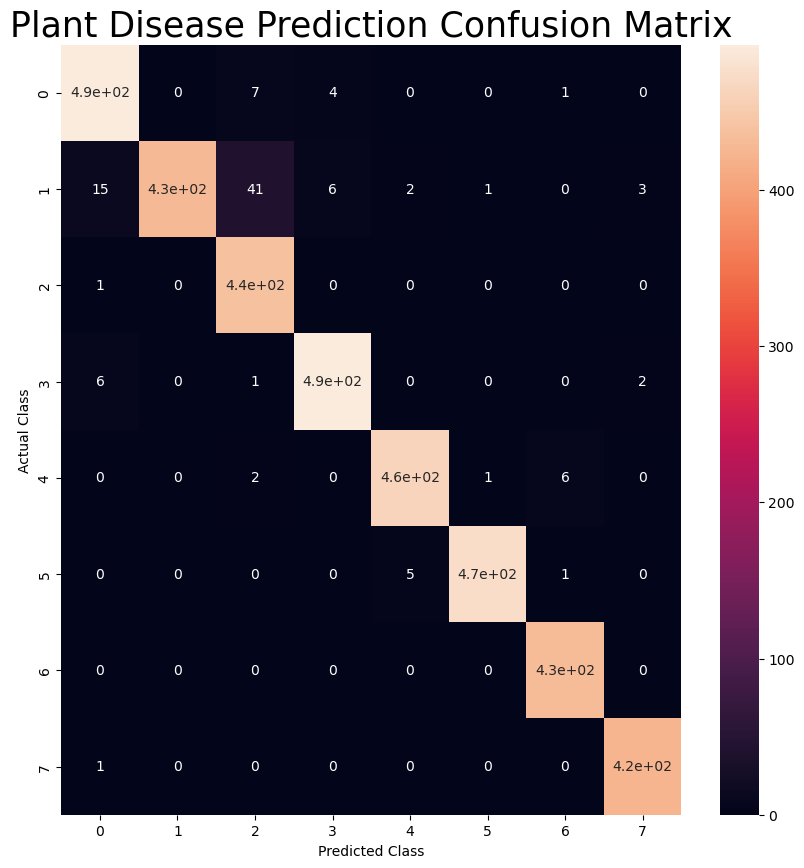

In [86]:

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()